# NetworkX - Dynamics

_The contents of this notebook have been derived from "A First Course in Network Science" by Filippo Menczer. [You can see their official Github repository here.](https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience/tree/master)_

This tutorial will show you how to use the included Simulation class to simulate node dynamics by specifying a graph, the initial state of the nodes, and node state transitions.


In [155]:
import matplotlib.pyplot as plt
import networkx as nx
import random

from simulation import Simulation

---


## The SIS model

This is one of the fundamental models of spreading dynamics on networks, examined in detail in the text. We will implement this spreading model using our simulation framework.


### The Graph


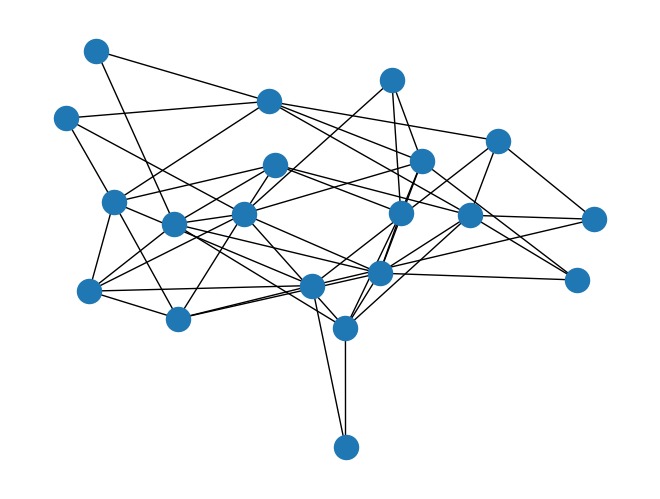

In [145]:
G = nx.gnm_random_graph(20, 50)
nx.draw(G)
plt.show()
plt.close()

### Initial state

We will initially assign every node to the 'S' state and then randomly choose one node to infect by setting it to the 'I' state. You should experiment with different choices of the "patient zero" node to infect and see how it affects the spreading dynamics, _e.g._ by selecting a high- or low-degree node.


In [146]:
def initial_state(G: nx.Graph) -> dict:
    state = {}
    for node in G.nodes:
        state[node] = "S"

    patient_zero = random.choice(list(G.nodes))
    state[patient_zero] = "I"
    return state

Let's make sure this works:


In [147]:
initial_state(G)

{0: 'S',
 1: 'S',
 2: 'S',
 3: 'S',
 4: 'S',
 5: 'S',
 6: 'S',
 7: 'S',
 8: 'S',
 9: 'S',
 10: 'S',
 11: 'S',
 12: 'S',
 13: 'S',
 14: 'S',
 15: 'S',
 16: 'I',
 17: 'S',
 18: 'S',
 19: 'S'}

### State transition

The SIS model involves two parameters, $\beta$ is the probability to transition from S to I given an infected neighbor, and $\mu$, the probability of transitioning from I to S.

In pseudocode, the algorithm looks like this:

- For each node in the graph
  - If node has state I
    - The node transitions to state S with probability $\mu$
  - Else node has state S
    - For each neighbor of the node
      - If neighbor has state I
        - The node transitions to state I with probability $\beta$

The logic gets a little deep with the indentations, but the code looks very much like this pseudocode.


In [148]:
def state_transition(
    G: nx.Graph, current_state: dict, mu: float = 0.1, beta: float = 0.1
) -> dict:
    next_state = {}
    for node in G.nodes:
        if current_state[node] == "I":
            if random.random() < mu:
                next_state[node] = "S"
        else:  # current_state[node] == 'S'
            for neighbor in G.neighbors(node):
                if current_state[neighbor] == "I":
                    if random.random() < beta:
                        next_state[node] = "I"

    return next_state

Let's test this out before moving forward:


In [149]:
test_state = initial_state(G)
state_transition(G, test_state)

{}

It's possible, depending on your parameter values, that the first transition results in no state changes. This is okay, even expected. It might take a few tries before any states are updated and a nonempty dict is produced. It's also okay to skip this, as we're just checking our code accuracy, but it is easier to debug here than in the simulation proper.


### Simulation

Now let's create the simulation and visualize the initial state:


In [150]:
sim = Simulation(G, initial_state, state_transition, name="SIS model")

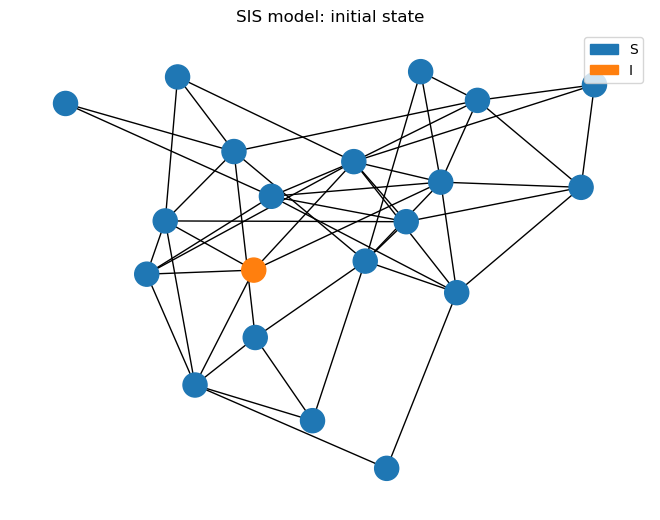

In [151]:
sim.draw()
plt.show()
plt.close()

### Run the simulation

Let's run this simulation several steps and see where we end up:


In [152]:
sim.run(25)

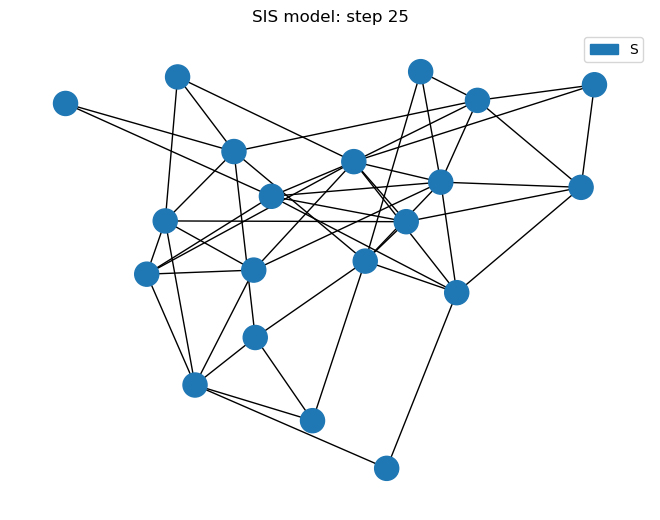

In [153]:
sim.draw()
plt.show()
plt.close()

It's probably different from where we started; let's see how we got here:


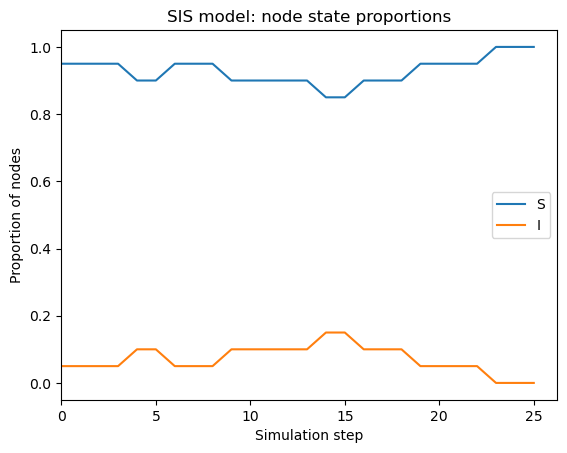

In [154]:
sim.plot()
plt.show()
plt.close()

Go ahead and execute the previous few cells again, running the simulation forward and examining the state, until it reaches the long-term steady state: eventually the proportion curves will flatten out as the proportion of each node state will fluctuate around some average value.

Now go back, adjust the `BETA` and `MU` parameter values, and see how the steady state changes!


---
